<a href="https://colab.research.google.com/github/shwetajain1022/Project-4/blob/main/AUS_solar_model_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("model_data/energyconsumptiongdppopulation.csv")
print(df.head())

  country_code    country  distribution_losses_electricity  \
0          ARG  Argentina                              0.0   
1          ARG  Argentina                              0.0   
2          ARG  Argentina                              0.0   
3          ARG  Argentina                              0.0   
4          ARG  Argentina                              0.0   

   coal_peat_and_manufactured_gases  combustible_renewables  geothermal  \
0                          254.9680                103.7220         0.0   
1                           59.6120                 23.6500         0.0   
2                          276.3790                 57.9470         0.0   
3                          189.0145                 56.9715         0.0   
4                            0.0000                 97.5631         0.0   

       hydro  natural_gas   nuclear  oil_and_petroleum_products  ...  \
0  1890.1710    6962.6050  356.1880                   1383.5360  ...   
1  2367.2000    6072.3430  717.6

In [5]:
# Create df of only datapoint from Australia, sorted by date
aus_df = df[df['country_code'] =='AUS'].sort_values('date')

# Show tail of df
aus_df.tail()

,country_code,country,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,...,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,GDPpermonth,date,populationpermonth
107,AUS,Australia,956.6238,10981.4369,260.1933,0.0,1447.4330,3825.7274,0.0,358.2577,...,0.0,0.0,2471.1030,2543.3373,0.0,0.0,71.0923,1.293892e+11,2021-08-01,25677149.0
227,AUS,Australia,885.7965,9632.6947,258.0133,0.0,1355.8280,3225.9545,0.0,302.0923,...,0.0,0.0,3010.1989,2456.0600,0.0,0.0,66.5930,1.293892e+11,2021-09-01,25679881.5
215,AUS,Australia,906.2037,9785.5864,255.2949,0.0,1364.7672,3226.1624,0.0,302.1118,...,0.0,0.0,3537.4364,2219.7411,0.0,0.0,67.0321,1.293892e+11,2021-10-01,25682614.0
203,AUS,Australia,891.5757,9705.0796,249.7668,0.0,1366.0608,3137.7105,0.0,293.8288,...,0.0,0.0,3337.9144,2270.4233,0.0,0.0,67.0956,1.293892e+11,2021-11-01,25685346.5
119,AUS,Australia,966.5667,10291.7452,260.9344,0.0,1105.0617,3382.2842,0.0,316.7317,...,0.0,0.0,4401.2416,2316.3975,0.0,0.0,54.2764,1.293892e+11,2021-12-01,25688079.0


In [7]:
# Get date range of data
print(f'Latest date: {aus_df.date.max()}')
print(f'Latest date: {aus_df.date.min()}')

Latest date: 2021-12-01
Latest date: 2010-01-01


In [8]:
# Convert date to datetime datatype
aus_df['date'] = aus_df['date'].astype('datetime64[ns]')

# Check datatypes
aus_df.dtypes

country_code                                   object
country                                        object
distribution_losses_electricity               float64
coal_peat_and_manufactured_gases              float64
combustible_renewables                        float64
geothermal                                    float64
hydro                                         float64
natural_gas                                   float64
nuclear                                       float64
oil_and_petroleum_products                    float64
other_combustible_non-renewables              float64
other_renewables                              float64
others                                        float64
solar                                         float64
wind                                          float64
total_exports_electricity                     float64
total_imports_electricity                     float64
used_for_pumped_storage_electricity           float64
GDPpermonth                 

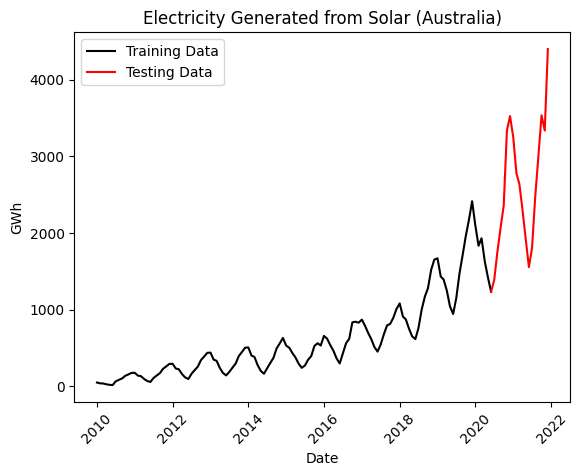

In [19]:
# Set date parameters for train and test data
train = aus_df[aus_df.date < pd.to_datetime("2020-07-01", format='%Y-%m-%d')]
test = aus_df[aus_df.date >= pd.to_datetime("2020-06-01", format='%Y-%m-%d')]

# Plot data
plt.plot(train['date'],train['solar'], color = "black", label= "Training Data")
plt.plot(test['date'],test['solar'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Solar (Australia)")
plt.legend()
plt.show()

In [14]:
# Import model dependencies
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
# Set y value to training data
y = train['solar']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


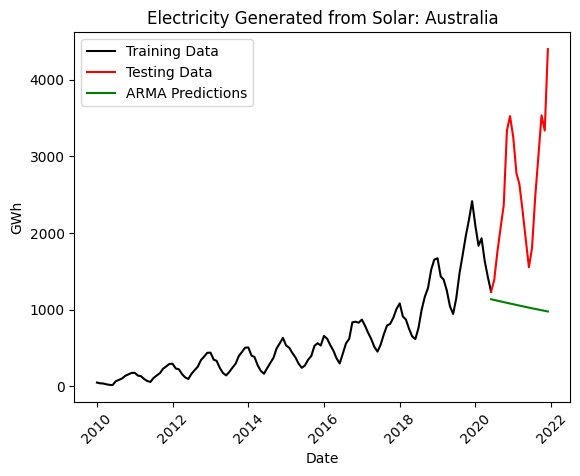

RMSE:  1738.3854810653472


In [24]:
# Set initial inputs and parameters for ARMA model
ARMAmodel = SARIMAX(y, order = (1, 0, 1), enforce_stationarity=False)

# Fit model
ARMAmodel = ARMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arma = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['solar'], color = "black", label= "Training Data")
plt.plot(test['date'],test['solar'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Solar: Australia")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arma_rmse = np.sqrt(mean_squared_error(test["solar"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integ

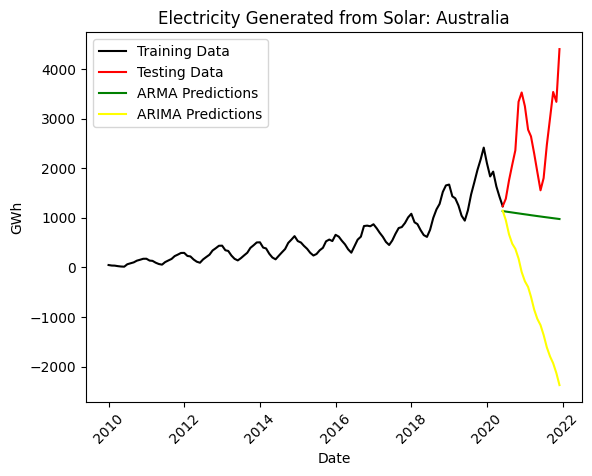

RMSE:  3593.074309771689


In [25]:
# Set initial inputs and parameters for ARIMA model
ARIMAmodel = ARIMA(y, order = (2, 2, 2))

# Fit model
ARIMAmodel = ARIMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARIMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arima = y_pred_df["Predictions"]

# Plot data
plt.plot(train['date'],train['solar'], color = "black", label= "Training Data")
plt.plot(test['date'],test['solar'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Solar: Australia")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arima_rmse = np.sqrt(mean_squared_error(test["solar"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arima_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. P

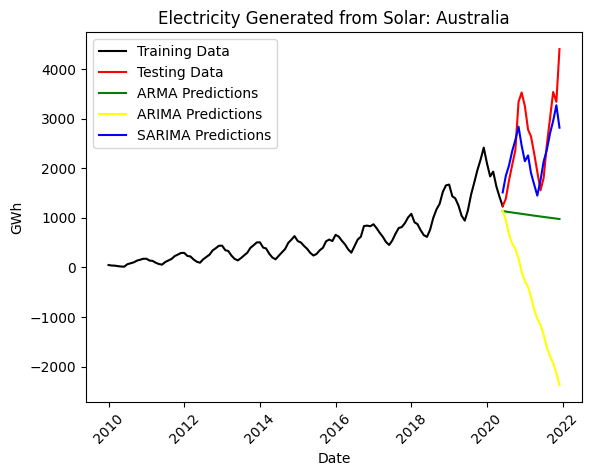

RMSE:  635.854004869381


In [26]:
# Set initial inputs and parameters for SARIMA model
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel = SARIMAXmodel.fit()

# Set other inputs and parameters for model
y_pred = SARIMAXmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_sarima = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['solar'], color = "black", label= "Training Data")
plt.plot(test['date'],test['solar'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Solar: Australia")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
sarima_rmse = np.sqrt(mean_squared_error(test["solar"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

In [32]:
# Check data for stationarity using Dickey-Fuller test
# For stationarity to be present, p-value < 0.05

# Import dependencies
from statsmodels.tsa.stattools import adfuller

# Apply test to data
result = adfuller(y)

# Print results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# Given p-value > 0.05, data is not stationary

ADF Statistic: 2.314931
p-value: 0.998964
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581


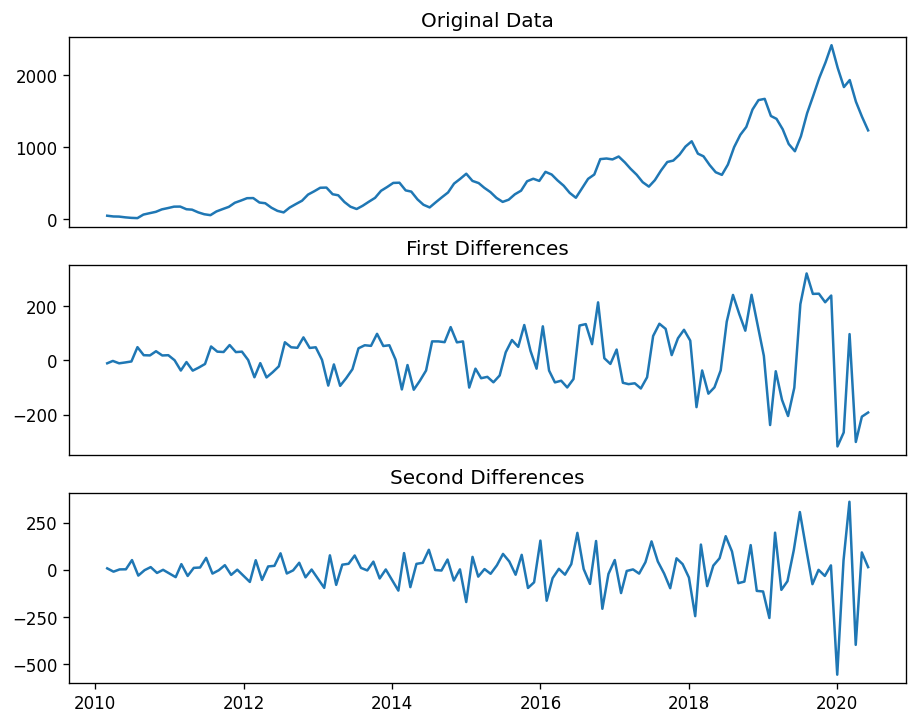

In [36]:
# Test for optimal SARIMA d-value - for (p,d,q) variables
# The d-value controls the model's integration order of the data
# The best d-value will be represented by whether 1st/2nd order differences produce data that stationary, but not increasingly noisy.

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(train['date'], y); ax1.set_title('Original Data'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(train['date'], y.diff()); ax2.set_title('First Differences'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(train['date'], y.diff().diff()); ax3.set_title('Second Differences')
plt.show()

# First differences show data being stationary
# Second differences show increased noise (vs. first differences)
# Result is that d = 1 is optimal

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction res

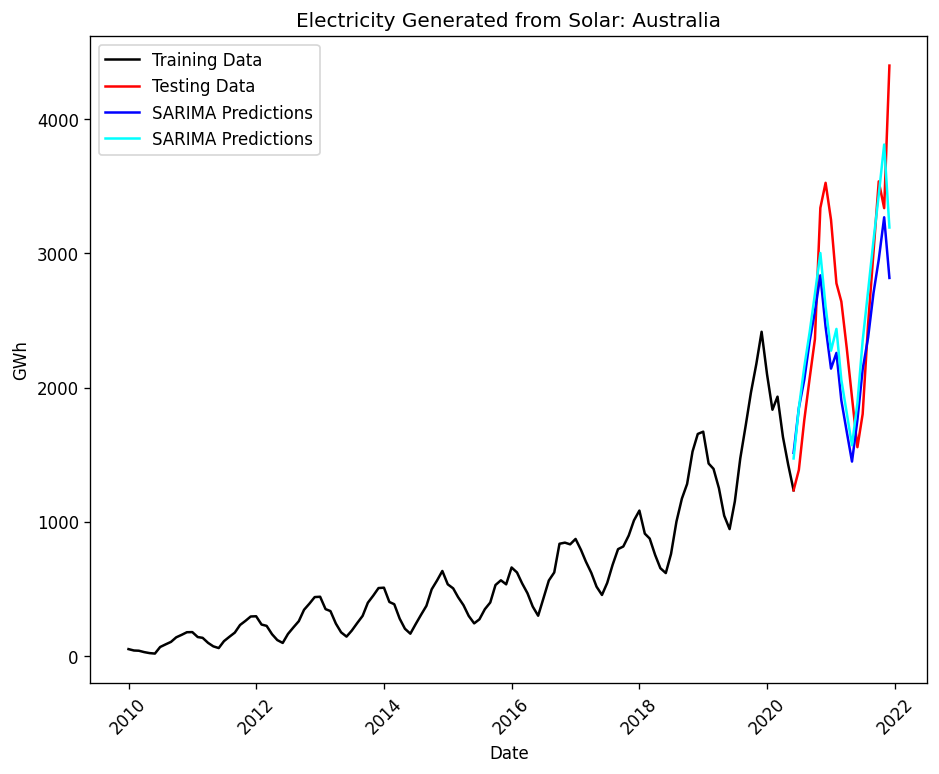

SARIMA_V2 RMSE:  541.2708802043566


In [37]:
# Set initial inputs and parameters for SARIMA model
SARIMAXmodel_v2 = SARIMAX(y, order = (5, 1, 2), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel_v2 = SARIMAXmodel_v2.fit()

# Set other inputs and parameters for model
y_pred = SARIMAXmodel_v2.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel_v2.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_sarima_v2 = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['solar'], color = "black", label= "Training Data")
plt.plot(test['date'],test['solar'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Solar: Australia")
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_sarima_v2, color='Cyan', label = 'SARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
sarima_v2_rmse = np.sqrt(mean_squared_error(test["solar"].values, y_pred_df["Predictions"]))
print("SARIMA_V2 RMSE: ",sarima_v2_rmse)

In [27]:
# Use Sarima model to forecast datapoints
SARIMAXmodel_fcast = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel_fcast = SARIMAXmodel_fcast.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [29]:
# Create forecast date range, monthly frequency
index_future_dates=pd.date_range(start='2022-01-01',end='2025-01-01', freq='MS')

# Predict data for forecast date range using SARIMA model
pred=SARIMAXmodel_fcast.predict(start=len(aus_df),end=len(aus_df)+36,typ='levels').rename('SARIMA Predictions')

# Set forecast date range to index
pred.index=index_future_dates

#Print forecast data
print(pred)

2022-01-01    2817.405828
2022-02-01    2481.555982
2022-03-01    2641.590078
2022-04-01    2254.286361
2022-05-01    2012.892138
2022-06-01    1779.770587
2022-07-01    2149.498535
2022-08-01    2590.664539
2022-09-01    2875.535110
2022-10-01    3275.825269
2022-11-01    3582.422466
2022-12-01    3972.123062
2023-01-01    3483.659742
2023-02-01    3152.575980
2023-03-01    3386.091637
2023-04-01    2997.874441
2023-05-01    2782.854649
2023-06-01    2573.083246
2023-07-01    3036.858293
2023-08-01    3579.340683
2023-09-01    3950.576046
2023-10-01    4457.277718
2023-11-01    4860.923869
2023-12-01    5365.781182
2024-01-01    4882.681303
2024-02-01    4599.746410
2024-03-01    4950.814441
2024-04-01    4607.589068
2024-05-01    4465.545580
2024-06-01    4327.079082
2024-07-01    4933.668730
2024-08-01    5627.761998
2024-09-01    6137.203188
2024-10-01    6802.819416
2024-11-01    7357.561118
2024-12-01    8033.279538
2025-01-01    7612.799469
Freq: MS, Name: SARIMA Predictions, dt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


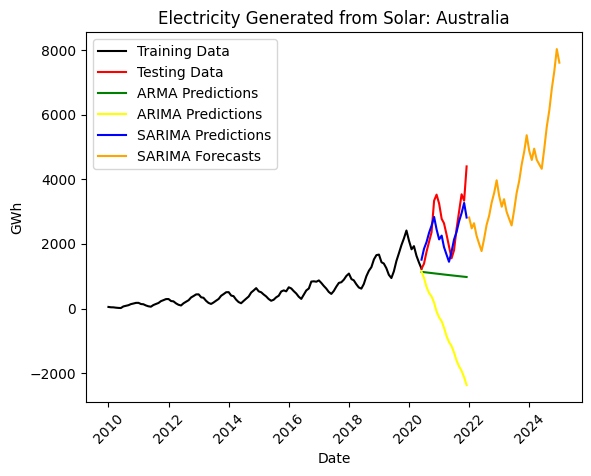

In [30]:
# Plot forecast data
plt.plot(train['date'],train['solar'], color = "black", label= "Training Data")
plt.plot(test['date'],test['solar'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Solar: Australia")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.plot(pred.index,pred, color='Orange', label= 'SARIMA Forecasts')
plt.legend()
plt.show()
